# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 4_Statistics & Probability

## 2. Probability


**Contents of this note refer to 1) Dr. Joe Anderson's teaching materials; 2) textbook "Data Science from Scratch";**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

# Probability and Random Variables

## Review of Some Concepts

### Probability

We use the language of probability to give structure to uncertain and complex processes. When we talk about a "random variable" we mean an observable phenomenon that takes values in a particular universe of possibility.

For example, flipping a coin can take values in $\{H, T\}$, and to each we assign a probability $P(H)$ and $P(T)$. $P(H)$ means the probability of the event $H$ happens, and $P(T)$ means the probability of the event $T$ happens.


### Dependence and Independence

We say two events E and F are *dependent* if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise, they are independent.

When two events E and F are *independent*, the probability that they both happen is the product of the probabilities that each one happens:

$P(E,F) = P(E) * P(F)$

For example, let's flip a coin twice. The probability of "first flip heads" is 1/2, and the probability of "both flips heads" is 1/2 * 1/2 = 1/4.

### Conditional Probability

If two events E and F are not necessarily independent, then we define the probability of E "conditional on F" as $P(E|F) = \frac{P(E,F)}{P(F)}$.

Question: what is the value of $P(E|F)$ if E and F are independent?

### Bayes' Theorem

Bayes' theorem is a way of "reversing" conditional probabilities. If we want to know the probability of event E conditional on event F, $P(E|F)$, but we only know the probability of event F conditional on event E, $P(F|E)$. We can calculate $P(E|F)$ as following:

$$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E)*P(E)}{P(F)}$$

### Random Variables

A *random variable* is a variable whose possible values have an associated probability distribution.

A simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails (A more complicated one may measure the number of heads you observe when flipping a coin 10 times).

*expected value* of a random variable is the average of its values weighted by their probabilities. The coin flip variable has an expected value of (0 * 0.5 + 1 * 0.5) = 0.5.

#### Discrete Random Variables

The random variable $X$ is said to be discrete if sample space (i.e. possible values) $\Omega$ is countable (either finite or countably infinite).

Examples:
- flip of a coin
- number of people in a class


We define the cumulative probability function (cdf) for discrete random variable $X$ as
$$ P(X \leq t) = \sum_{\omega \leq t} P(X = \omega) $$
i.e. the sum of probabilities for all values at most $t$.

#### Continuous Random Variables

A random variable $X$ is continuous if the associated sample space (i.e. possible values) $\Omega$ is uncountably infinite. 

For example:
- A random draw from $(0,1)$
- Temperature measured on a day (with infinite precision)
- Measuring speed of cars on a road at a certain location

We then define the cdf for continuous random variable $X$ as $P(X \leq t)$, which is usually defined for that specific random variable/distribution. However, most common continuous random variables have a Probability Density Function (pdf) called $f_X(x)$ so that 
$$ P(X \leq t) = \int_{-\infty}^{t} f_X(x) dx $$


## Uniform distribution

Look at uniform draw from interval $(0,1)$. Call this draw $X$. The distribution is denoted $U(0,1)$ when all values have equal probability, i.e. the uniform distribution on $(0,1)$.

The pdf of this is then 
$$ f_X(x) = 
\begin{cases}
0 \text{ if } x \not \in (0,1) \\
1 \text{ otherwise}
\end{cases}
$$
because we still need the law of total probability:
$$ \int_{-\infty}^{\infty} f_X(x) dx = \int_{0}^{1} f_X(x) dx = 1 $$

In general for interval $(a,b)$ the uniform distribution has pdf 
$$ f(x) =
\begin{cases}
0 \text{ if } x \not \in (a,b) \\
\frac{1}{b-a} \text{ otherwise}
\end{cases}
$$

In [1]:
def uniform_pdf(x,a,b):
    return 1/(b-a) if a <= x and x <= b else 0

def uniform_cdf(t,a,b):
    if t < a:
        return 0
    if t > b:
        return 1
    return (t-a)/(b-a)

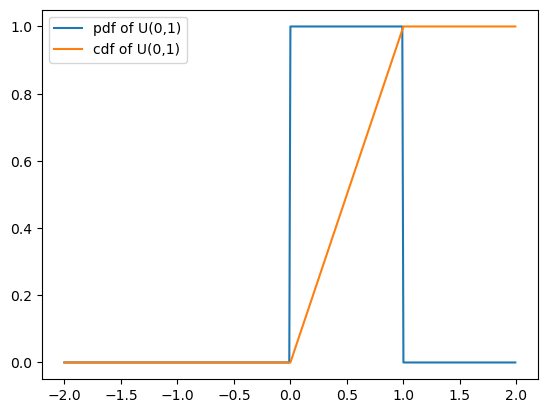

In [2]:
from matplotlib import pyplot as plt
import numpy as np

xs = np.arange(-2,2,0.01)
ys = [uniform_pdf(x,0,1) for x in xs]
plt.plot(xs, ys)

ys = [uniform_cdf(x,0,1) for x in xs]
plt.plot(xs, ys)

plt.legend(['pdf of U(0,1)', 'cdf of U(0,1)'])
plt.show()

Now, for random variable $X$ distributed as $U(a,b)$, calculate the cdf:
First, suppose $t \in (a,b)$.

$$ P(X \leq t) = \int_{-\infty}^{t} f_X(x) dx = \int_{a}^{t} \frac{1}{b-a} dx = \frac{1}{b-a} x \bigg \vert_{a}^{t} = \frac{t}{b-a} - \frac{a}{b-a} = \frac{t-a}{b-a}$$
so final form:

$$ P(X \leq t)  = 
\begin{cases}
0 \text{ if } t <= a \\
\frac{t-a}{b-a} \text{ if } t \in (a,b) \\
1 \text{ if } t > b \\
\end{cases}
$$

Try calculating the mean of $X$ when distributed as $U(0,1)$:

$$\mathbb{E}X = \int_{-\infty}^{\infty} x f_X(x) dx = \int_{0}^{1} x dx = \frac{x^2}{2} \bigg \vert_{0}^{1} = 1/2 $$

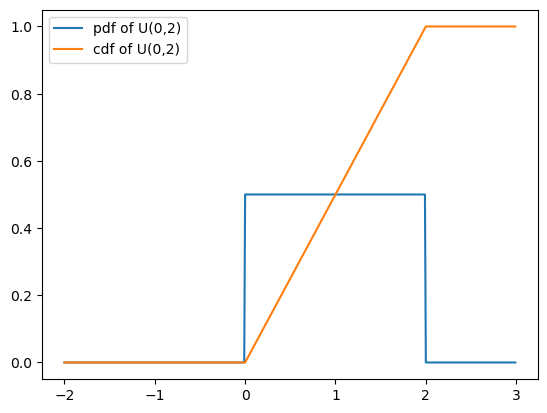

In [3]:
# how about uniform distribution in interval (0,2)
from matplotlib import pyplot as plt
import numpy as np

xs = np.arange(-2,3,0.01)
ys = [uniform_pdf(x,0,2) for x in xs]
plt.plot(xs, ys)

ys = [uniform_cdf(x,0,2) for x in xs]
plt.plot(xs, ys)

plt.legend(['pdf of U(0,2)', 'cdf of U(0,2)'])

## Normal Distribution

Also called the Gaussian distribution (a bell curve-shaped distribution), the pdf is
$$ f_X(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) $$
and we normally abbreviate this distribution as $ \mathcal{N}(\mu, \sigma^2) $.
In this formulation, the mean is $\mu$ that indicates where the bell is centered; the standard deviation $\sigma$ (or variance $\sigma^2$) indicates how wide the bell is.



In [4]:
import math

def normal_pdf(x, mu, sigma):
    return (1/(sigma*np.sqrt(2 * np.pi))) * np.exp(-1*(x - mu)**2 / (2 * sigma**2))

def normal_cdf(x, mu, sigma):
    return (1 + math.erf((x-mu)/(sigma*np.sqrt(2))))/2
# math.erf(x): Return the error function at x.
# The erf() function can be used to compute traditional statistical functions 
# such as the cumulative standard normal distribution
# https://docs.python.org/3/library/math.html

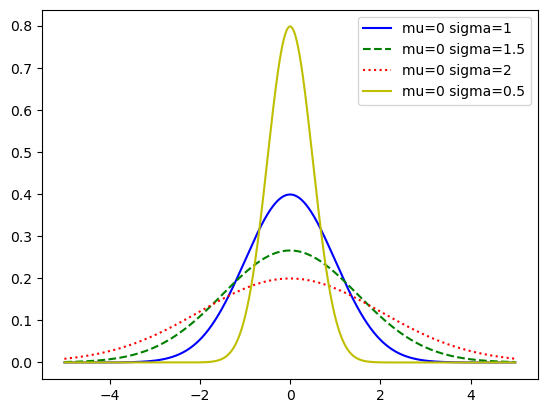

In [5]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_pdf(x,0,1) for x in xs], 'b', label='mu=0 sigma=1')
plt.plot(xs, [normal_pdf(x,0,1.5) for x in xs], 'g--', label='mu=0 sigma=1.5')
plt.plot(xs, [normal_pdf(x,0,2) for x in xs], 'r:', label='mu=0 sigma=2')
plt.plot(xs, [normal_pdf(x,0,0.5) for x in xs], 'y', label='mu=0 sigma=0.5')
plt.legend()

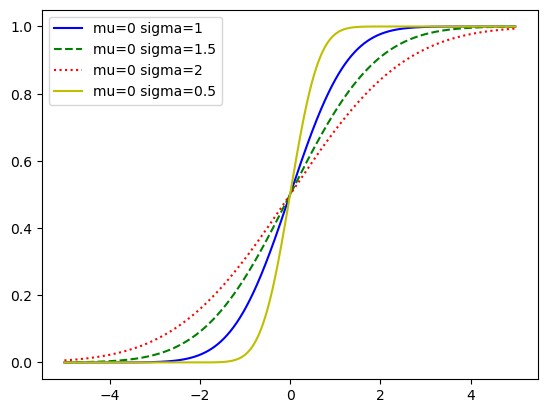

In [6]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_cdf(x,0,1) for x in xs], 'b', label='mu=0 sigma=1')
plt.plot(xs, [normal_cdf(x,0,1.5) for x in xs], 'g--', label='mu=0 sigma=1.5')
plt.plot(xs, [normal_cdf(x,0,2) for x in xs], 'r:', label='mu=0 sigma=2')
plt.plot(xs, [normal_cdf(x,0,0.5) for x in xs], 'y', label='mu=0 sigma=0.5')
plt.legend()

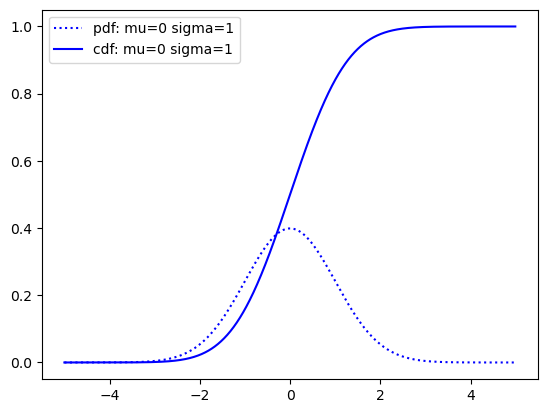

In [7]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_pdf(x,0,1) for x in xs], 'b:', label='pdf: mu=0 sigma=1')
plt.plot(xs, [normal_cdf(x,0,1) for x in xs], 'b', label='cdf: mu=0 sigma=1')
plt.legend()

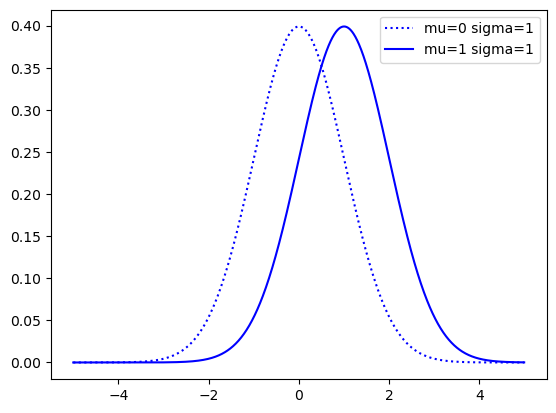

In [8]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_pdf(x,0,1) for x in xs], 'b:', label='mu=0 sigma=1')
plt.plot(xs, [normal_pdf(x,1,1) for x in xs], 'b', label='mu=1 sigma=1')
plt.legend()

# Central Limit Theorem

The normal distribution is very useful because of the central limit theorem, which says that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

Let $X$ be *any* random variable with mean $\mu$ and variance $\sigma^2$.
Then if you have $x_1, x_2, \dots, x_N$ iid (independent and identially distributed) copies/observations of $X$, the quantity
$$ \bar{x} = \frac{1}{N} (x_1 + x_2 + \dots + x_N) $$
will, if $N$ is large enough, behave like $\mathcal{N}\left( \mu, \frac{\sigma^2}{N} \right)$.
That is, the empirical mean (interpreted now as a random variable) will look normal, if enough samples are used.


### Case study: flipping a coin.

We're given a (maybe unfair) coin that flips heads with probabilitiy $p$ and tails with probability $1-p$.
We want to estimate $p$ by flipping the coin ourselves.

So lets repeat the following experiment: Flip the coin $n$ times, calculate the average.
But after repeating this, look at the distribution of values. What will it look like?

A coin flip is usually referred to as a Bernoilli random variable.
Call this distribution $\operatorname{Bernoulli}(p)$, which then has mean $p$ and variance $p(1-p)$.
The value of a Bernoulli random variable is 1 with probability $p$ and 0 with probability $1-p$.


Now, we talk about the quantity $X_1 + X_2 + \dots + X_n$ when each $X_i$ is Bernoulli$(p)$ is called the Binomial distribution, denote as $\operatorname{Binom(n,p)}$.
The mean of a Binomial$(n,p)$ is
$$ \mathbb{E}(X_1 + X_2 + \dots + X_N) = \mathbb{E}(X_1) + \dots + \mathbb{E}(X_N) = np $$
The variance is then
$$
\operatorname{Var}(X_1 + X_2 + \dots + X_N) = n \operatorname{Var}(X_1) = np(1-p)
$$

So the distribution of estimated mean will behave like $\mathcal{N}(np, np(1-p))$.

Counter({50: 800, 51: 788, 48: 750, 49: 745, 52: 743, 47: 674, 53: 646, 54: 612, 46: 570, 55: 478, 45: 458, 44: 405, 56: 398, 43: 300, 57: 292, 58: 234, 42: 212, 59: 157, 41: 155, 40: 123, 60: 107, 61: 66, 39: 66, 62: 53, 38: 50, 37: 38, 63: 25, 65: 13, 64: 12, 36: 10, 35: 10, 33: 2, 31: 2, 68: 1, 34: 1, 69: 1, 71: 1, 32: 1, 67: 1})


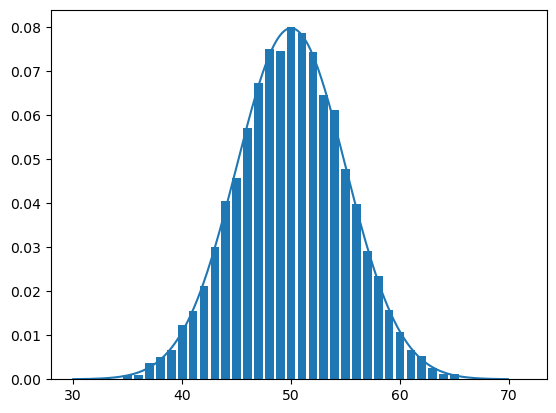

In [9]:
from collections import Counter

N = 100
bias = 0.5
num_trials = 10000

def binom_draw(n,p):
    """Generate one draw from a Binomial(n,p) distribution"""
    return np.sum(np.random.choice([0,1],size=n,p=[1-p,p]))
# see next cell for information about the choice function

observations = [binom_draw(N,bias) for _ in range(num_trials)]

# want to plot the distribution of these observations
counts = Counter(observations)
print(counts)

plt.bar([x for x in counts.keys()], [v / num_trials for v in counts.values()])

# now compare with actual normal pdf
mu = N*bias
sigma = math.sqrt(N*bias*(1-bias))

xs = np.arange(30,70,0.1)
plt.plot(xs, [normal_pdf(x,mu,sigma) for x in xs])

In [10]:
help(np.random.choice)
np.random.choice([0,1],p=[0.5, 0.5],size=10)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected mu

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])